# The Wages of Simpson

Copyright 2021 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ProbablyOverthinkingIt2/blob/master/simpson_wages.ipynb)

In [1]:
import pandas as pd


In [2]:
converter = lambda s: float(s.replace('$', ''))

converters = {
'Total, all educational levels' : converter,
'Less than a high school diploma' : converter,
'High school graduates, no college' : converter,
'Some college or associate degree' : converter,
"Bachelor's degree only" : converter,
'Advanced degree' : converter,
}

!wget https://www.bls.gov/opub/ted/2019/median-weekly-earnings-606-for-high-school-dropouts-1559-for-advanced-degree-holders.htm

In [8]:
filename = 'median-weekly-earnings-606-for-high-school-dropouts-1559-for-advanced-degree-holders.htm'

tables = pd.read_html(filename, converters=converters, parse_dates=[0])

In [9]:
df = tables[0]

In [10]:
df.head()

,Quarter,"Total, all educational levels",Less than a high school diploma,"High school graduates, no college",Some college or associate degree,Bachelor's degree only,Advanced degree
0,Q1 2000,603.0,365.0,503.0,590.0,825.0,997.0
1,Q2 2000,606.0,368.0,506.0,592.0,811.0,1044.0
2,Q3 2000,611.0,356.0,506.0,600.0,826.0,1039.0
3,Q4 2000,614.0,357.0,506.0,600.0,840.0,1020.0
4,Q1 2001,620.0,377.0,512.0,607.0,854.0,1047.0


In [12]:
df.tail()

,Quarter,"Total, all educational levels",Less than a high school diploma,"High school graduates, no college",Some college or associate degree,Bachelor's degree only,Advanced degree
74,Q3 2018,934.0,556.0,736.0,826.0,1232.0,1487.0
75,Q4 2018,946.0,543.0,746.0,853.0,1205.0,1544.0
76,Q1 2019,954.0,578.0,739.0,835.0,1213.0,1574.0
77,Q2 2019,960.0,588.0,751.0,848.0,1236.0,1561.0
78,Q3 2019,975.0,606.0,749.0,874.0,1281.0,1559.0


In [35]:
date_range = pd.date_range('2000-01-01', '2019-10-01', freq='Q')
df.index = date_range

In [17]:
df.dtypes

Quarter                               object
Total, all educational levels        float64
Less than a high school diploma      float64
High school graduates, no college    float64
Some college or associate degree     float64
Bachelor's degree only               float64
Advanced degree                      float64
dtype: object

In [18]:
del df['Quarter']

In [19]:
df.tail()

,"Total, all educational levels",Less than a high school diploma,"High school graduates, no college",Some college or associate degree,Bachelor's degree only,Advanced degree
2018-09-30,934.0,556.0,736.0,826.0,1232.0,1487.0
2018-12-31,946.0,543.0,746.0,853.0,1205.0,1544.0
2019-03-31,954.0,578.0,739.0,835.0,1213.0,1574.0
2019-06-30,960.0,588.0,751.0,848.0,1236.0,1561.0
2019-09-30,975.0,606.0,749.0,874.0,1281.0,1559.0


CPI data from https://data.bls.gov/pdq/SurveyOutputServlet

In [20]:
cpi = pd.read_excel('SeriesReport-20210413134155_d963cb.xlsx', skiprows=11)
cpi.index = cpi['Year']
cpi.drop(['Year', 'HALF1', 'HALF2'], axis=1, inplace=True)

/home/downey/anaconda3/envs/ProbablyOverthinkingIt/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [21]:
cpi.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1997,159.1,159.6,160.0,160.2,160.1,160.3,160.5,160.8,161.2,161.6,161.5,161.3
1998,161.6,161.9,162.2,162.5,162.8,163.0,163.2,163.4,163.6,164.0,164.0,163.9
1999,164.3,164.5,165.0,166.2,166.2,166.2,166.7,167.1,167.9,168.2,168.3,168.3
2000,168.8,169.8,171.2,171.3,171.5,172.4,172.8,172.8,173.7,174.0,174.1,174.0
2001,175.1,175.8,176.2,176.9,177.7,178.0,177.5,177.5,178.3,177.7,177.4,176.7


In [22]:
cpi_series = cpi.stack()
cpi_series.head()

Year     
1997  Jan    159.1
      Feb    159.6
      Mar    160.0
      Apr    160.2
      May    160.1
dtype: float64

In [30]:
cpi_trimmed = cpi_series.iloc[38:274:3]

In [31]:
cpi_trimmed.shape

(79,)

In [32]:
cpi_normalized = cpi_trimmed / cpi_trimmed.iloc[0]
cpi_normalized

Year     
2000  Mar    1.000000
      Jun    1.007009
      Sep    1.014603
      Dec    1.016355
2001  Mar    1.029206
               ...   
2018  Sep    1.474527
      Dec    1.467482
2019  Mar    1.484825
      Jun    1.496162
      Sep    1.499761
Length: 79, dtype: float64

In [36]:
df.shape

(79, 6)

In [65]:
import matplotlib.pyplot as plt

def decorate(**options):
    """Decorate the current axes.
    
    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
             
    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    """
    ax = plt.gca()
    ax.set(**options)
    
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels)

    plt.tight_layout()

In [66]:
def stretch_x(factor = 0.03):
    low, high = plt.xlim()
    space = (high-low) * factor
    plt.xlim(low - space, high + space)

In [67]:
def anchor_legend(x, y):
    """Place the upper left corner of the legend box.
    
    x: x coordinate
    y: y coordinate
    """
    plt.legend(bbox_to_anchor=(x, y), loc='upper left', ncol=1)    

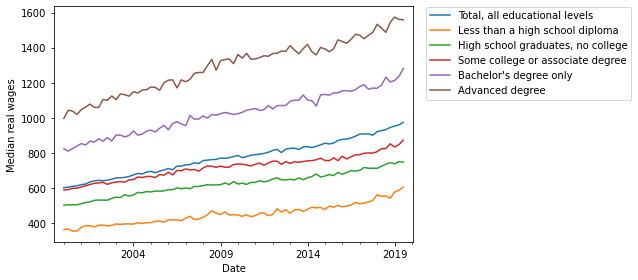

In [68]:
df.plot()

decorate(xlabel='Date', ylabel='Median real wages')
stretch_x()
anchor_legend(1.02, 1.02)

In [69]:
df_adjusted = df.div(cpi_normalized.values, axis=0)

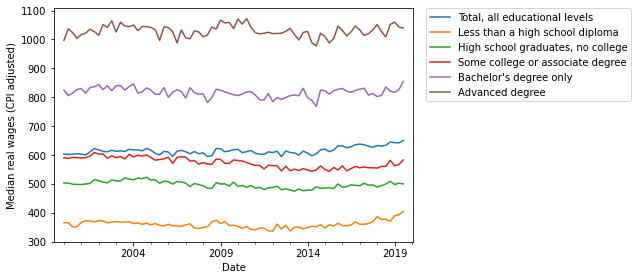

In [71]:
df_adjusted.plot()
decorate(xlabel='Date', 
         ylabel='Median real wages (CPI adjusted)')
stretch_x()
anchor_legend(1.02, 1.02)

In [83]:
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

def make_lowess(series):
    """Use LOWESS to compute a smooth line.
    
    series: pd.Series
    
    returns: pd.Series
    """
    y = series.values
    x = series.index.values

    smooth = lowess(y, x)
    index, data = np.transpose(smooth)

    return pd.Series(data, index=series.index) 

In [94]:
def plot_series_lowess(series, color):
    """Plots a series of data points and a smooth line.
    
    series: pd.Series
    color: string or tuple
    """
    #series.plot(linewidth=0, marker='o', color=color, alpha=0.1, label='_')
    smooth = make_lowess(series)
    smooth /= smooth.iloc[0] / 100
    smooth.plot(label=series.name, color=color)

In [95]:
def plot_columns_lowess(table, columns, colors):
    """Plot the columns in a DataFrame.
    
    table: DataFrame with a cross tabulation
    columns: list of column names, in the desired order
    colors: mapping from column names to colors
    """
    for col in columns:
        series = table[col]
        plot_series_lowess(series, colors[col])

In [96]:
colors = {
    'Total, all educational levels' : 'gray',
    'Less than a high school diploma' : 'C0',
    'High school graduates, no college' : 'C1',
    'Some college or associate degree' : 'C2',
    "Bachelor's degree only" : 'C3',
    'Advanced degree' : 'C4',
}

In [97]:
df_aligned = df_adjusted.div(df_adjusted.iloc[0], axis=1) * 100

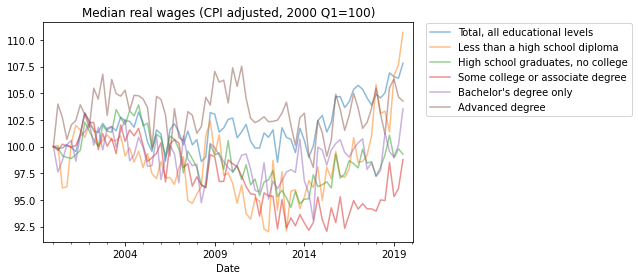

In [98]:
df_aligned.plot(alpha=0.5)
decorate(xlabel='Date', 
         title='Median real wages (CPI adjusted, 2000 Q1=100)')
stretch_x()
anchor_legend(1.02, 1.02)

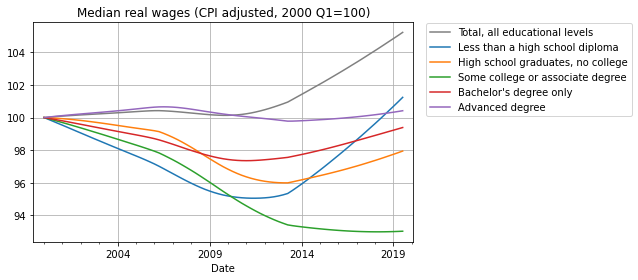

In [100]:
columns = df_aligned.columns
plot_columns_lowess(df_aligned, columns, colors)
plt.grid()
decorate(xlabel='Date', 
         title='Median real wages (CPI adjusted, 2000 Q1=100)')
stretch_x()
anchor_legend(1.02, 1.02)

In [3]:
gss = pd.read_hdf('gss_eda.hdf5', 'gss')

<AxesSubplot:xlabel='year'>

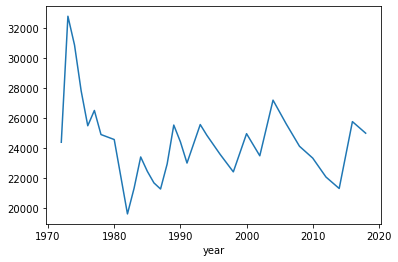

In [49]:
realinc_by_year = gss.groupby('year')['realinc'].median()

realinc_by_year.plot()

In [17]:
educ = gss['educ']

gss['bach'] = (educ >= 16)
gss['bach'].sum()

15065

In [18]:
gss['assc'] = (educ >= 14) & (educ < 16)
gss['assc'].sum()

10070

In [19]:
gss['high'] = (educ <= 12)
gss['high'].sum()

34142

In [38]:
educ_valid = gss[gss['educ'].notna()]
len(educ_valid)

64637

In [47]:
levels = ['high', 'assc', 'bach']
educ_levels = educ_valid.groupby('year')[levels].mean()
educ_levels

,high,assc,bach
year,,,
1972,0.713930,0.110075,0.118781
1973,0.690460,0.112742,0.135424
1974,0.677920,0.102633,0.149223
1975,0.697377,0.090787,0.134499
1976,0.697254,0.093101,0.146685
1977,0.700000,0.096711,0.144079
1978,0.672346,0.114679,0.144168
1980,0.661654,0.107314,0.164730
1982,0.663607,0.121490,0.138229


<AxesSubplot:xlabel='year'>

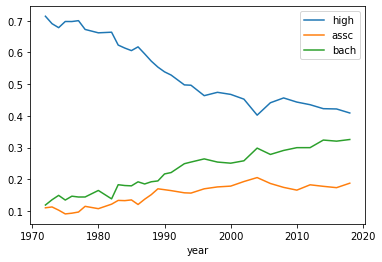

In [48]:
educ_levels.plot()

<AxesSubplot:xlabel='year'>

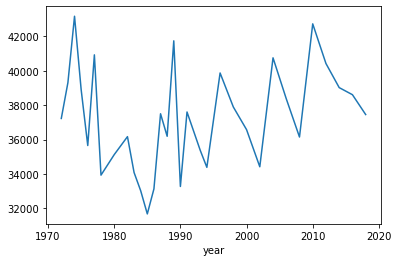

In [32]:
bach = educ_valid[educ_valid['bach']].groupby('year')['realinc'].median()
bach.plot()

<AxesSubplot:xlabel='year'>

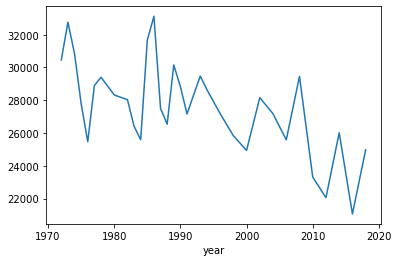

In [33]:
assc = educ_valid[educ_valid['assc']].groupby('year')['realinc'].median()
assc.plot()

<AxesSubplot:xlabel='year'>

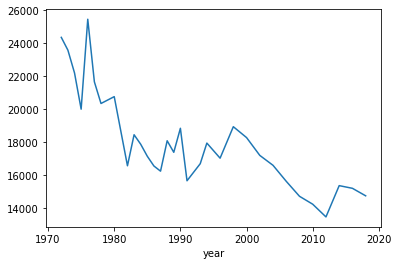

In [34]:
high = educ_valid[educ_valid['high']].groupby('year')['realinc'].median()
high.plot()